In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Machine learning algos
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

In [3]:
#exploring data
import pandas as pd
data = pd.read_csv(r"C:\Users\Admin\Desktop\asd\Train.csv")
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
#info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
print(data.isnull().values.any()) #to check null values in the dataset 
print (data.isnull().sum().sum()) #total number of null values in the dataset
data.shape


True
3873


(8523, 12)

In [6]:
print(data.nunique()) #number of unique values in each column of the dataset

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64


In [7]:
data.isnull().sum() #number of NULL values in each column of the dataset

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
data=data.dropna()#removing NULL values from the dataset
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [9]:
print(data.isnull().values.any())
print(data.isnull().values.sum())

False
0


In [10]:
data.describe()#descriptive statistics

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,4650.000000,4650.000000,4650.000000,4650.000000,4650.000000
mean,12.898675,0.060700,141.716328,1999.190538,2272.037489
std,4.670973,0.044607,62.420534,7.388800,1497.964740
min,4.555000,0.000000,31.490000,1987.000000,69.243200
25%,8.770000,0.025968,94.409400,1997.000000,1125.202000
50%,12.650000,0.049655,142.979900,1999.000000,1939.808300
75%,17.000000,0.088736,186.614150,2004.000000,3111.616300
max,21.350000,0.188323,266.888400,2009.000000,10256.649000


In [11]:
#plotting our data for visualization

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

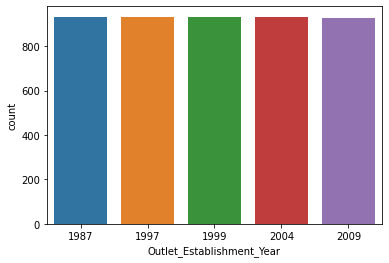

In [12]:
sns.countplot(data = data , x = 'Outlet_Establishment_Year')

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Outlet_Location_Type'>

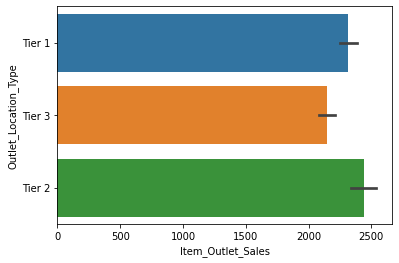

In [13]:
sns.barplot(y="Outlet_Location_Type",x="Item_Outlet_Sales",data=data)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

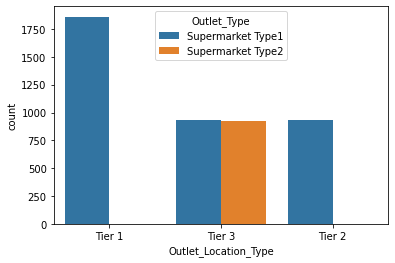

In [14]:
sns.countplot(x="Outlet_Location_Type",data=data,hue="Outlet_Type")

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'OUT049'),
  Text(1, 0, 'OUT018'),
  Text(2, 0, 'OUT013'),
  Text(3, 0, 'OUT046'),
  Text(4, 0, 'OUT035')])

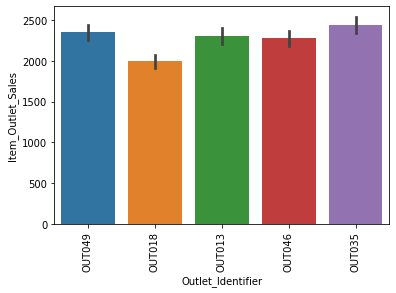

In [15]:
sns.barplot(x="Outlet_Identifier",y="Item_Outlet_Sales",data=data)
plt.xticks(rotation =90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'OUT049'),
  Text(1, 0, 'OUT018'),
  Text(2, 0, 'OUT013'),
  Text(3, 0, 'OUT046'),
  Text(4, 0, 'OUT035')])

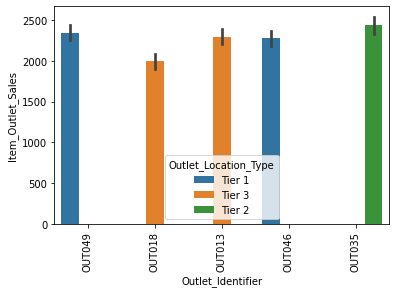

In [16]:
sns.barplot(x="Outlet_Identifier",y="Item_Outlet_Sales",data=data,hue="Outlet_Location_Type")
plt.xticks(rotation =90)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

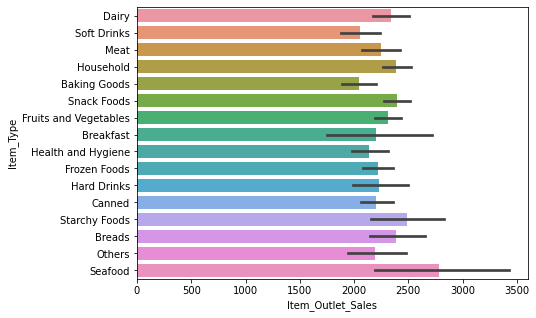

In [17]:
plt.figure(figsize=(7,5))
sns.barplot(y='Item_Type', x='Item_Outlet_Sales', data=data)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

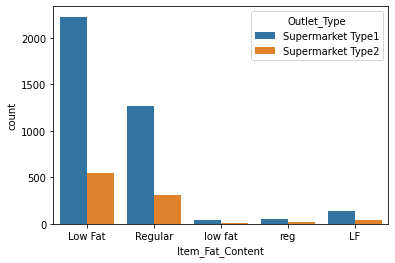

In [18]:
sns.countplot(x="Item_Fat_Content",data=data,hue="Outlet_Type")

Text(0, 0.5, 'Item_Outlet_Sales')

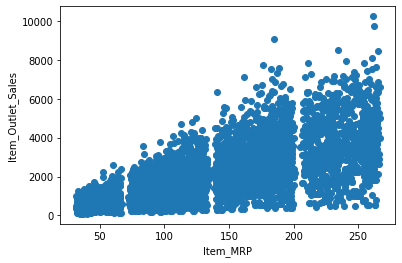

In [19]:
plt.figure()
plt.scatter(data['Item_MRP'], data["Item_Outlet_Sales"])
plt.xlabel("Item_MRP")
plt.ylabel("Item_Outlet_Sales")

In [20]:
# converting data into numerical form

In [21]:
data=data.drop(["Item_Identifier", "Outlet_Identifier"], axis='columns')
data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
5,10.395,Regular,0.000000,Baking Goods,51.4008,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...
8517,20.750,reg,0.083607,Frozen Foods,178.8318,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [22]:
data['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [23]:
data["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Household', 'Baking Goods',
       'Snack Foods', 'Fruits and Vegetables', 'Breakfast',
       'Health and Hygiene', 'Frozen Foods', 'Hard Drinks', 'Canned',
       'Starchy Foods', 'Breads', 'Others', 'Seafood'], dtype=object)

In [24]:
data["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2'], dtype=object)

In [25]:
data["Outlet_Size"].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [26]:
# refining
# converting data into numerical form
data["Item_Fat_Content"]=data["Item_Fat_Content"].replace({"Low Fat": 1, "Regular": 2, "LF": 3, "reg": 4, "low fat":5})

data["Outlet_Size"]=data["Outlet_Size"].replace({"Small":1, "Medium": 2, "High": 3})

data["Item_Type"]=data["Item_Type"].replace({"Snack Foods": 1, "Fruits and Vegetables": 2, "Baking Goods": 3, "Breads": 4, 
                                              "Hard Drinks": 5, "Starchy Foods": 6, "Breakfast": 7, "Canned": 8, "Dairy": 9, "Frozen Foods": 10, 
                                            "Health and Hygiene": 11, "Household": 12, "Meat": 13, "Others": 14, "Seafood": 15, "Soft Drinks": 16})

data["Outlet_Location_Type"]=data["Outlet_Location_Type"].replace({"Tier 1": 1, "Tier 2": 2, "Tier 3": 3})

data["Outlet_Type"]= data["Outlet_Type"].replace({"Supermarket Type1": 1, "Supermarket Type2": 2})                                              
data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,9,249.8092,1999,2,1,1,3735.1380
1,5.920,2,0.019278,16,48.2692,2009,2,3,2,443.4228
2,17.500,1,0.016760,13,141.6180,1999,2,1,1,2097.2700
4,8.930,1,0.000000,12,53.8614,1987,3,3,1,994.7052
5,10.395,2,0.000000,3,51.4008,2009,2,3,2,556.6088
...,...,...,...,...,...,...,...,...,...,...
8517,20.750,4,0.083607,10,178.8318,1997,1,1,1,3608.6360
8518,6.865,1,0.056783,1,214.5218,1987,3,3,1,2778.3834
8520,10.600,1,0.035186,11,85.1224,2004,1,2,1,1193.1136
8521,7.210,2,0.145221,1,103.1332,2009,2,3,2,1845.5976


In [27]:
#Predictive Algorithm:

In [28]:
#K-Means
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
pd.DataFrame(data_scaled)
# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8,9
count,4.650000e+03,4.650000e+03,4.650000e+03,4.650000e+03,4.650000e+03,4.650000e+03,4.650000e+03,4.650000e+03,4.650000e+03,4.650000e+03
mean,1.084915e-16,-1.382884e-16,-1.436366e-16,-2.979695e-17,-5.615580e-17,-7.328522e-15,-1.505128e-16,-7.640244e-19,2.536561e-16,5.042561e-17
std,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00
min,-1.786474e+00,-6.798477e-01,-1.360945e+00,-1.317022e+00,-1.766056e+00,-1.650045e+00,-1.069045e+00,-1.118034e+00,-4.993279e-01,-1.470683e+00
25%,-8.839955e-01,-6.798477e-01,-7.787273e-01,-1.106128e+00,-7.579560e-01,-2.964992e-01,-1.069045e+00,-1.118034e+00,-4.993279e-01,-7.656781e-01
50%,-5.324415e-02,-6.798477e-01,-2.476359e-01,1.592364e-01,2.024507e-02,-2.579013e-02,2.665433e-01,0.000000e+00,-4.993279e-01,-2.218109e-01
75%,8.781394e-01,6.630970e-01,6.285671e-01,7.919187e-01,7.193570e-01,6.509825e-01,2.665433e-01,1.118034e+00,-4.993279e-01,5.605400e-01
max,1.809523e+00,4.691931e+00,2.861373e+00,1.846389e+00,2.005518e+00,1.327755e+00,1.602132e+00,1.118034e+00,2.002692e+00,5.330880e+00


In [29]:
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(data_scaled)

KMeans(n_clusters=3)

In [30]:
kmeans.inertia_

30180.722845554774

Text(0, 0.5, 'Inertia')

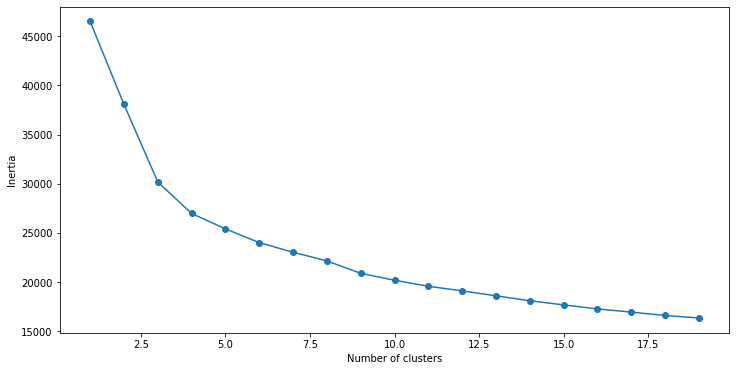

In [31]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [32]:
kmeans = KMeans(n_clusters = 6, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [33]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

5    961
1    901
4    900
3    896
0    788
2    204
Name: cluster, dtype: int64